In [1]:
import os

import numpy as np
import pandas as pd
from importlib import reload
import matplotlib.pyplot as plt

from src import constants as Con

from src.predictive_modeling.answer_correctness.answer_correctness_data import (
    build_trial_level_full_features_for_correctness,

)
from src.predictive_modeling.answer_correctness.answer_correctness_models import (
    MajorityBaselineCorrectness,
    AreaMetricsCorrectnessLogRegModel,
    DerivedFeaturesCorrectnessLogRegModel,
    FullFeaturesCorrectnessLogRegModel,
)
from src.predictive_modeling.answer_correctness.answer_correctness_eval import (
    evaluate_models_on_answer_correctness,
    evaluate_models_on_answer_correctness_leave_one_trial_out
)
from src.predictive_modeling.answer_correctness.answer_correctness_viz import (
    plot_coef_summary_barh,
    show_correctness_model_results,
    plot_top_abs_coef_feature_frequency_across_participants,
)
from src.predictive_modeling.common.viz_utils import plot_confusion_heatmap


In [2]:
hunters = pd.read_csv("../data/hunters.csv")
gatherers = pd.read_csv("../data/gatherers.csv")

In [3]:
correctness_models = [
    MajorityBaselineCorrectness(),
    AreaMetricsCorrectnessLogRegModel(),
    DerivedFeaturesCorrectnessLogRegModel(),
    FullFeaturesCorrectnessLogRegModel(),
]

In [4]:
pref_specs = [
    (Con.MEAN_DWELL_TIME, "high"),
    (Con.MEAN_FIXATIONS_COUNT, "high"),
    (Con.MEAN_FIRST_FIXATION_DURATION, "high"),
    (Con.SKIP_RATE, "low"),
    (Con.AREA_DWELL_PROPORTION, "high"),
    (Con.MEAN_AVG_FIX_PUPIL_SIZE, "high"),
    (Con.MEAN_MAX_FIX_PUPIL_SIZE, "high"),
    (Con.MEAN_MIN_FIX_PUPIL_SIZE, "low"),
    (Con.FIRST_ENCOUNTER_AVG_PUPIL_SIZE, "high"),
]

In [5]:
all_participants = pd.concat([hunters, gatherers], ignore_index=True)

In [6]:
results_all_corr_full = evaluate_models_on_answer_correctness(
    df=all_participants,
    models=correctness_models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID),
    split_group_cols=[Con.PARTICIPANT_ID, Con.TRIAL_ID],
    builder_fn=lambda d, group_cols: build_trial_level_full_features_for_correctness(
        d,
        group_cols=group_cols,
        pref_specs=pref_specs,
    ),
)

show_correctness_model_results(results_all_corr_full)


KeyboardInterrupt



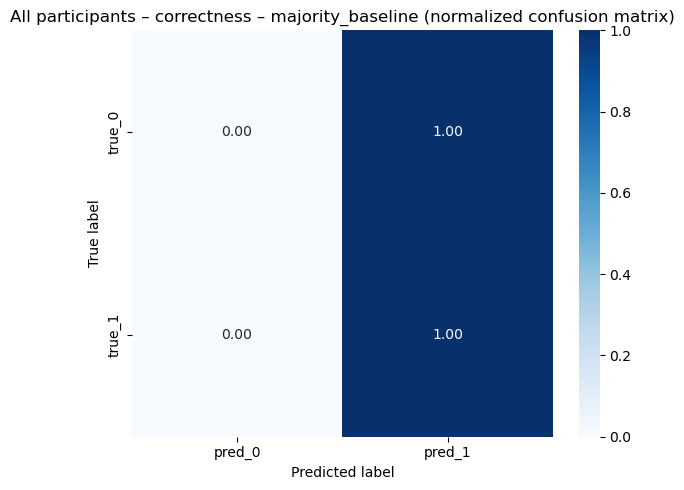

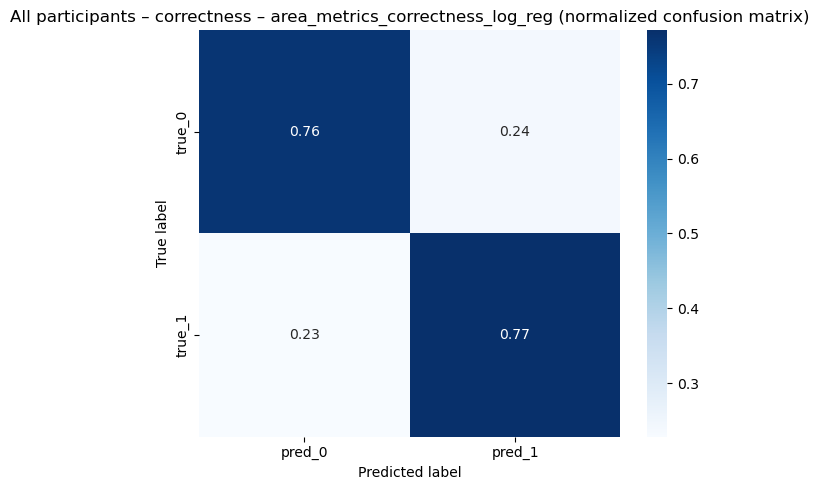

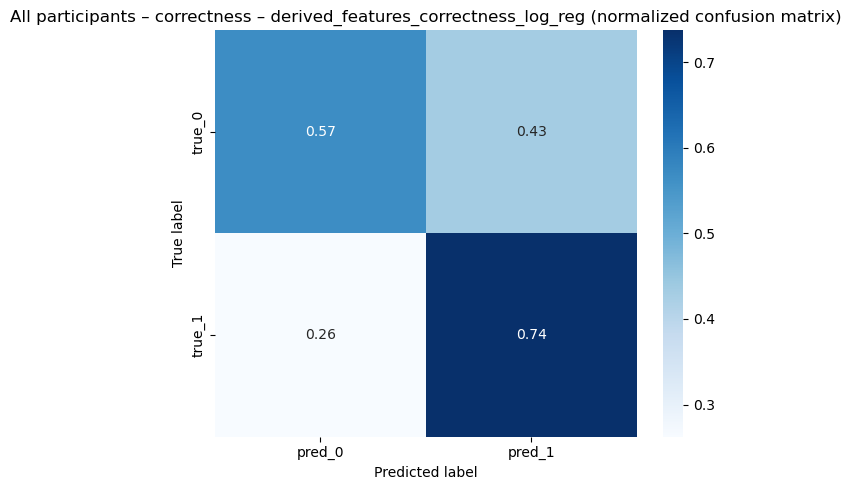

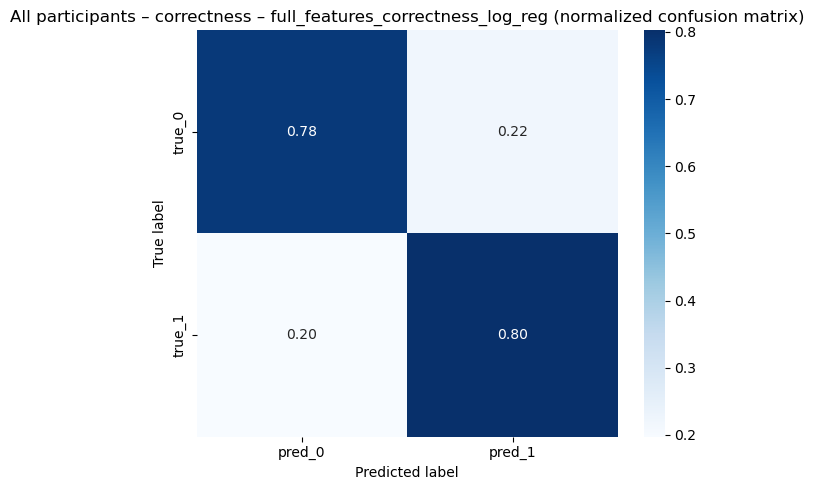

In [7]:
for name, res in results_all_corr_full.items():
    plot_confusion_heatmap(
        y_true=res.y_true,
        y_pred=res.y_pred,
        labels=(0, 1),
        include_minus1=False,
        normalize=True,
        title=f"All participants – correctness – {name} (normalized confusion matrix)",
    )

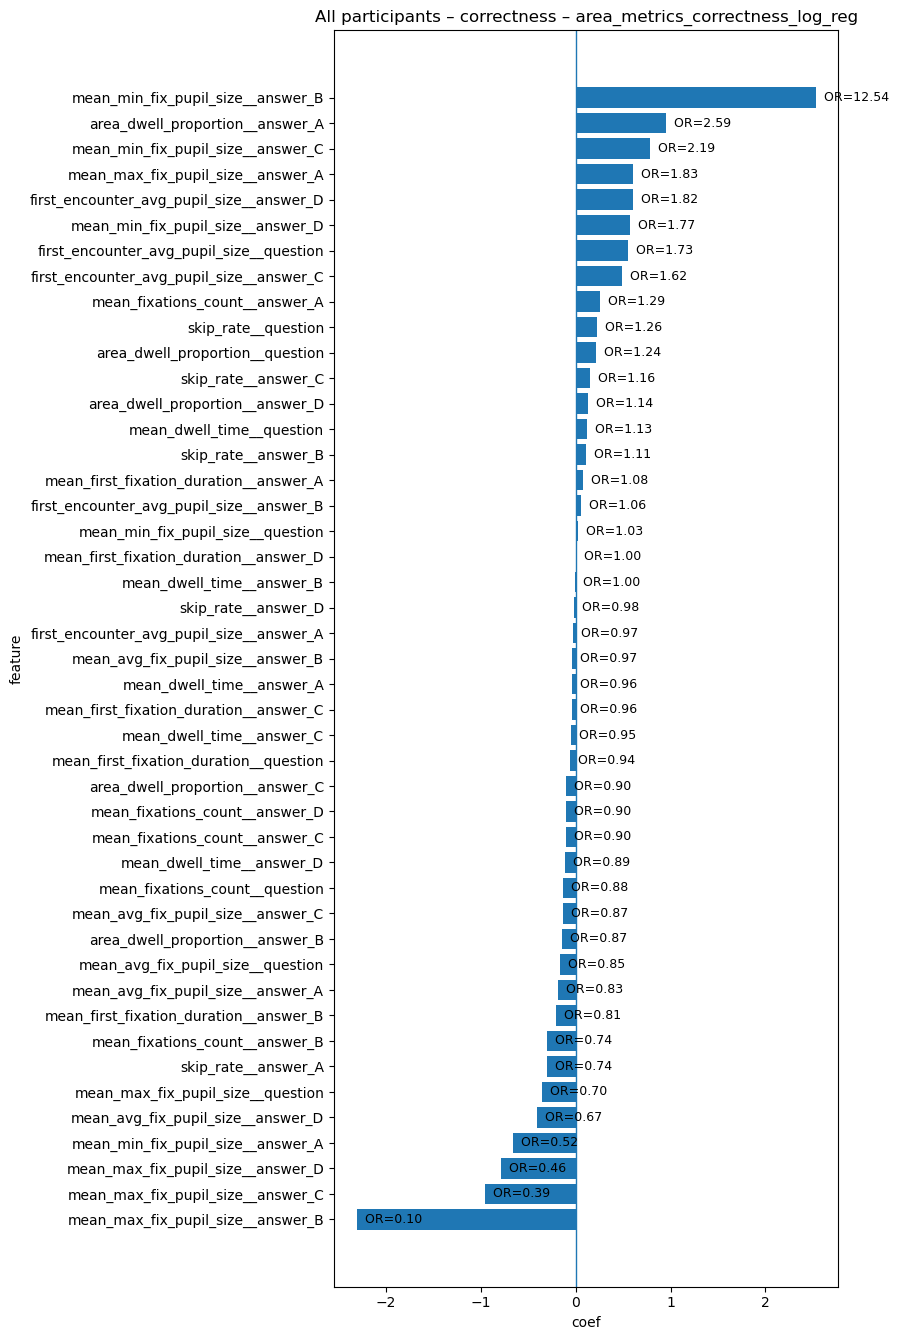

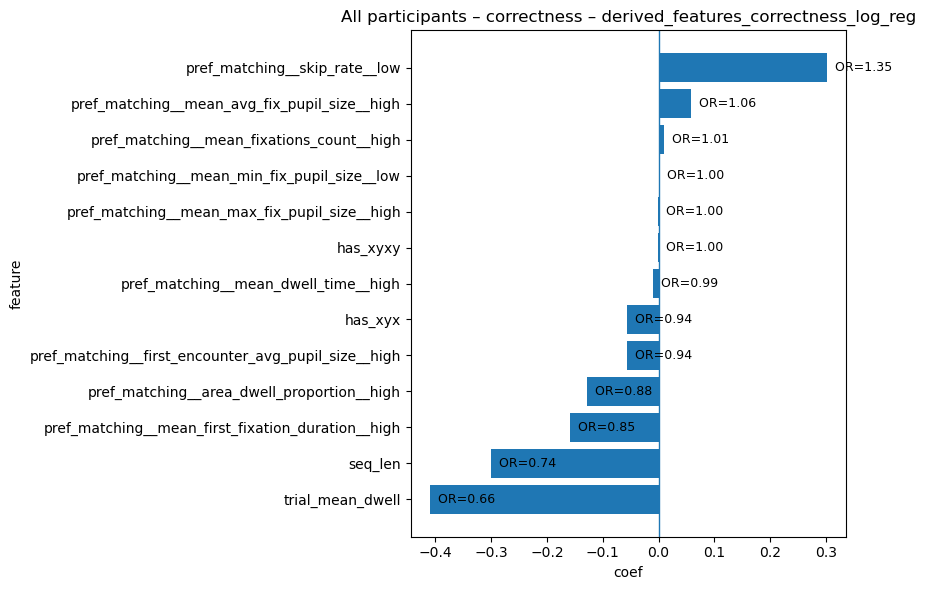

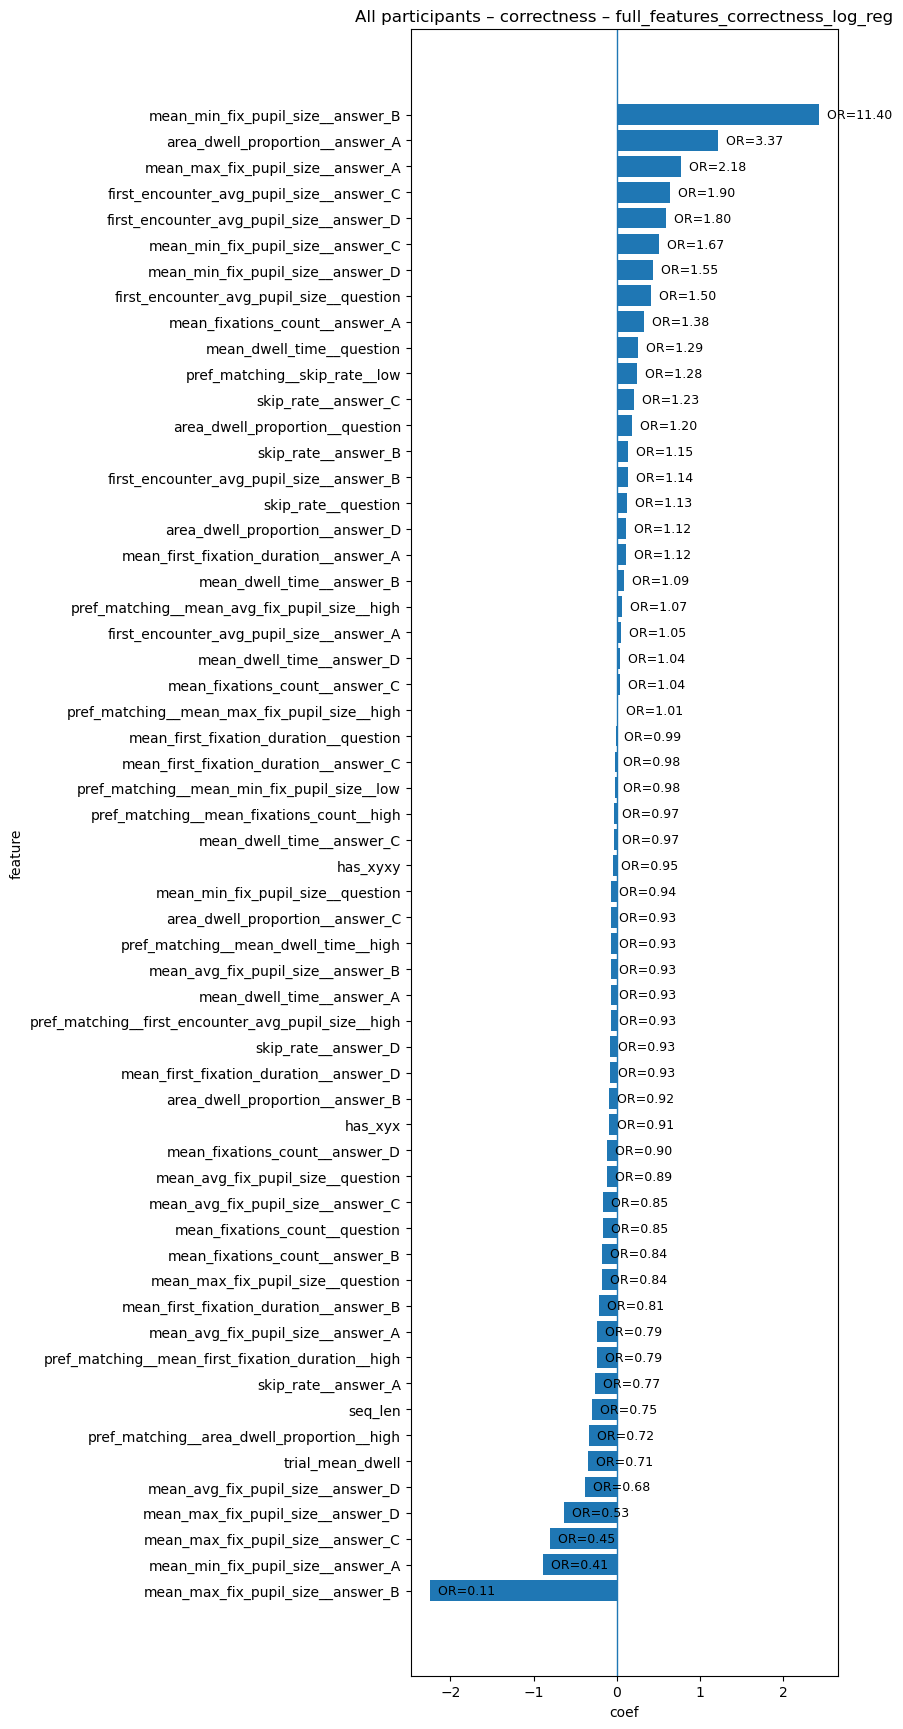

In [8]:
for model_name, res in results_all_corr_full.items():
    if res.coef_summary is None or res.coef_summary.empty:
        continue

    plot_coef_summary_barh(
        coef_summary=res.coef_summary,
        value_col ="coef",
        model_name=model_name,
        title=f"All participants – correctness – {model_name}",
        save=True,
    )


In [6]:
results_by_pid = evaluate_models_on_answer_correctness_leave_one_trial_out(
    df=all_participants,
    models=correctness_models,
    group_cols=(Con.PARTICIPANT_ID, Con.TRIAL_ID),
    builder_fn=lambda d, group_cols: build_trial_level_full_features_for_correctness(
        d,
        group_cols=group_cols,
        pref_specs=pref_specs,
    ),
)

In [16]:
# base_out = "../reports/plots/participent_correctness_coeffs"
#
# for pid, per_model in results_by_pid.items():
#     for model_name, res in per_model.items():
#         if res.coef_summary is None or res.coef_summary.empty:
#             continue
#
#         save_path = os.path.join(base_out, model_name, f"{pid}.png")
#
#         fig, _ = plot_coef_summary_barh(
#             coef_summary=res.coef_summary,
#             value_col="coef",
#             model_name=model_name,
#             title=f"Participant {pid} – correctness – {model_name}",
#             save=True,
#             save_path=save_path,
#         )
#
#         plt.close(fig)

,feature,count,n_pos,n_neg,n_zero,total_occ,prop,sign_varies,majority_sign,minority_count
40,trial_mean_dwell,1,0,1,0,1,0.002809,False,-1,0
8,first_encounter_avg_pupil_size__answer_D,1,1,0,0,1,0.002809,False,1,0
39,skip_rate__question,1,1,0,0,1,0.002809,False,1,0
15,mean_dwell_time__question,1,0,1,0,1,0.002809,False,-1,0
24,mean_fixations_count__question,2,0,2,0,2,0.005618,False,-1,0
22,mean_fixations_count__answer_C,2,0,2,0,2,0.005618,False,-1,0
14,mean_dwell_time__answer_D,2,0,2,0,2,0.005618,False,-1,0
6,first_encounter_avg_pupil_size__answer_B,2,2,0,0,2,0.005618,False,1,0
19,mean_first_fixation_duration__answer_D,3,2,1,0,3,0.008427,True,1,1
4,area_dwell_proportion__question,3,0,3,0,3,0.008427,False,-1,0


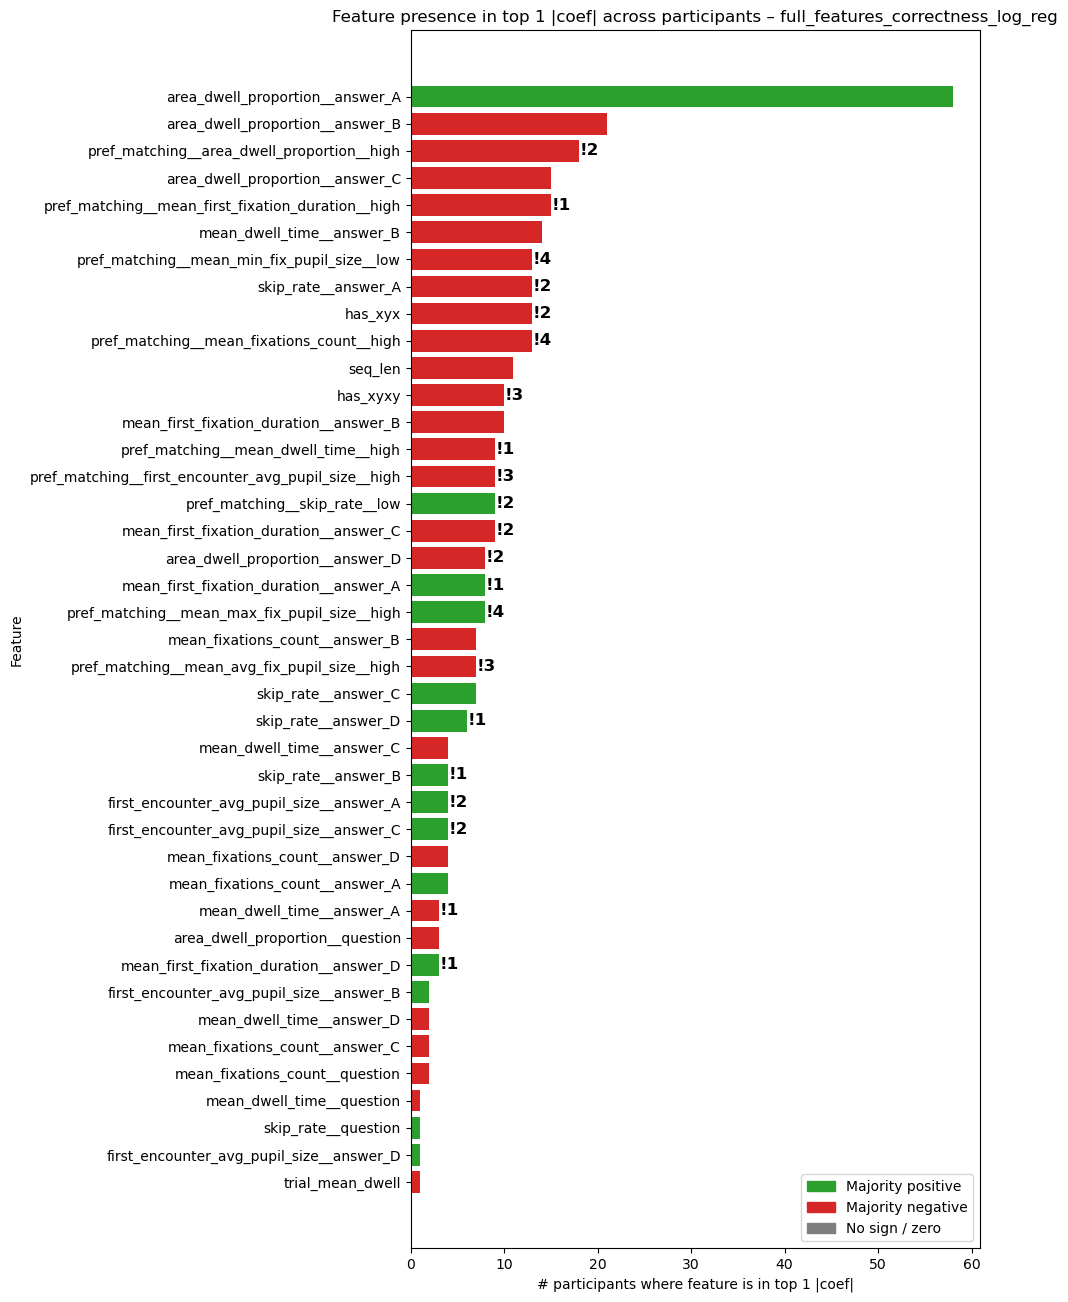

In [7]:
i = 1

fig, summary_df = plot_top_abs_coef_feature_frequency_across_participants(
    results_by_pid=results_by_pid,
    model_name="full_features_correctness_log_reg",
    coef_col="coef",
    top_k_within_participant=i,
    top_k_features=70,
    save_path=f"../reports/plots/participent_correctness_coeffs/top{i}_presence_full_features.png",
)

summary_df

In [8]:
from src.predictive_modeling.answer_correctness.answer_correctness_participant_similarity import (
    build_participant_clustering_inputs,
    compute_participant_distance_matrix,
)
from src.predictive_modeling.answer_correctness.answer_correctness_participant_similarity_viz import (
    hierarchical_cluster_participants,
    plot_participant_dendrogram,
    compute_participant_umap,
    plot_participant_umap,
)

C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
model_name = "full_features_correctness_log_reg"

inputs = build_participant_clustering_inputs(
    results_by_pid=results_by_pid,
    model_name=model_name,
    coef_col="coef",
    zscore=True,
)

In [10]:
D = compute_participant_distance_matrix(inputs.coef_matrix_z, metric="cosine")
clust = hierarchical_cluster_participants(D, linkage_method="average", cut_mode="n_clusters", n_clusters=5)

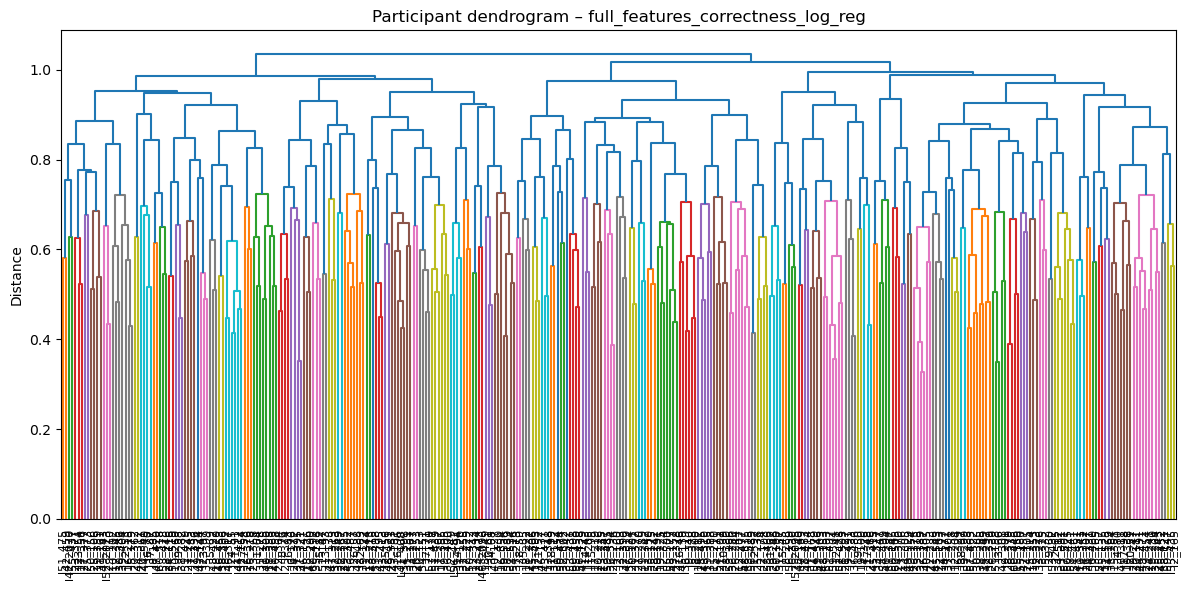

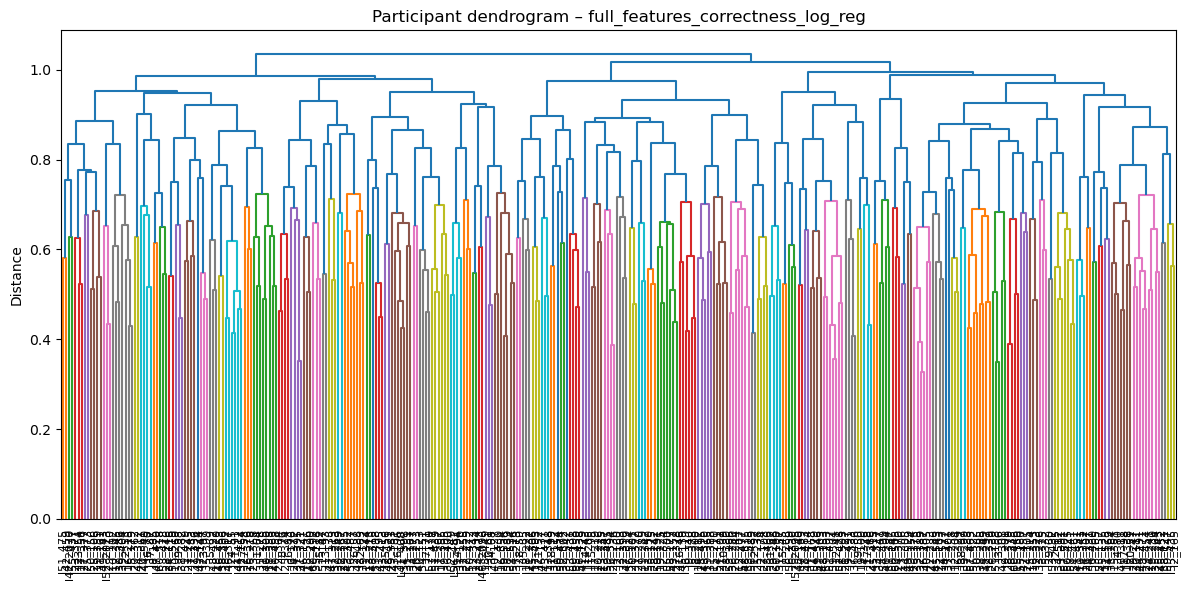

In [11]:
plot_participant_dendrogram(
    clust,
    title=f"Participant dendrogram – {model_name}",
    save_path=f"../reports/plots/participant_similarity/correctness/{model_name}/dendrogram.png",
)


C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\deeth\miniconda3\envs\QA_eyetracking_env\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


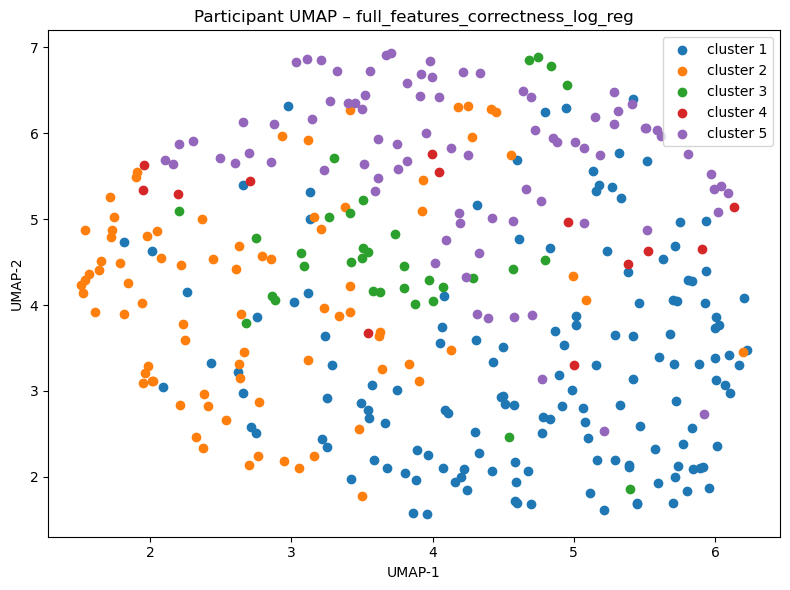

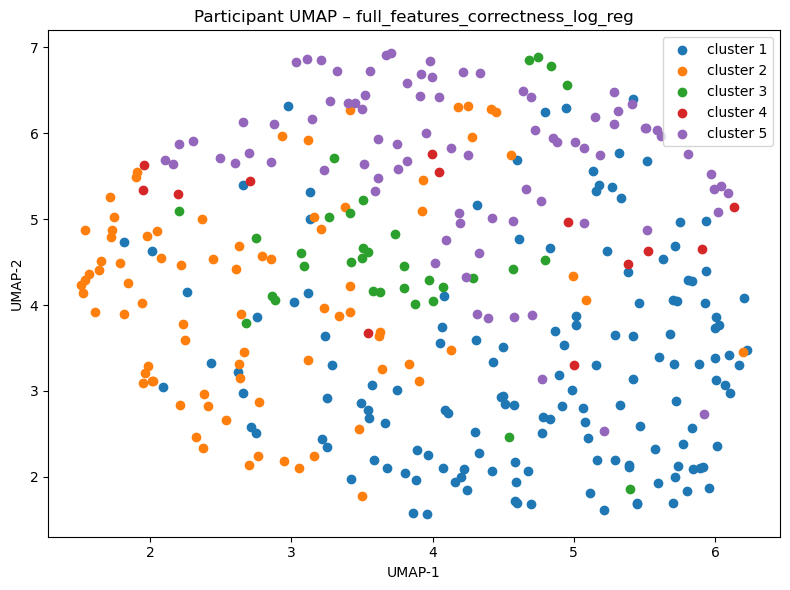

In [12]:
umap_xy = compute_participant_umap(inputs.coef_matrix_z, metric="cosine", random_state=42)
plot_participant_umap(
    umap_xy,
    labels=clust.labels,
    title=f"Participant UMAP – {model_name}",
    save_path=f"../reports/plots/participant_similarity/correctness/{model_name}/umap.png",
)

In [13]:
from src.predictive_modeling.answer_correctness.answer_correctness_participant_similarity_metrics import (
    evaluate_k_range_silhouette,
    evaluate_k_range_davies_bouldin,
    cophenetic_correlation,
    permutation_silhouette_baseline,
)
from src.predictive_modeling.answer_correctness.answer_correctness_participant_similarity import (
    build_participant_clustering_inputs,
    compute_participant_distance_matrix,
)

model_name = "full_features_correctness_log_reg"

inputs = build_participant_clustering_inputs(
    results_by_pid=results_by_pid,
    model_name=model_name,
    coef_col="coef",
    zscore=True,
)

X = inputs.coef_matrix_z

# 1) silhouette across k
sil_df = evaluate_k_range_silhouette(X, distance_metric="cosine", linkage_method="average", k_range=range(2, 11))
print(sil_df)

# 2) davies-bouldin across k (optional)
db_df = evaluate_k_range_davies_bouldin(X, linkage_method="average", k_range=range(2, 11), normalize_rows_l2=True)
print(db_df)

# 3) dendrogram fidelity
D = compute_participant_distance_matrix(X, metric="cosine")
coph = cophenetic_correlation(D, linkage_method="average")
print("cophenetic correlation:", coph)

# 4) permutation baseline for a chosen k (e.g., k=5)
null_res = permutation_silhouette_baseline(
    X, distance_metric="cosine", linkage_method="average", n_clusters=5, n_permutations=200
)
print(null_res)


    k  silhouette
0   2    0.063240
1   3    0.049676
2   4    0.036176
3   5    0.024572
4   6    0.025600
5   7    0.026047
6   8    0.027362
7   9    0.030977
8  10    0.032781
    k  davies_bouldin
0   2        5.230564
1   3        4.385852
2   4        4.418612
3   5        3.956533
4   6        3.907432
5   7        3.757552
6   8        3.604446
7   9        3.674381
8  10        3.568830
cophenetic correlation: 0.3341593268996665
{'real_silhouette': 0.02457163353135743, 'null_mean': 0.013682252865471747, 'null_std': 0.0021514724457537947, 'z_score': 5.061361900022129}
